# Optimal Approximation of Distribution B

In [50]:
from matplotlib import pyplot as plot
from scipy.linalg import lstsq
from sympy import Symbol, cos, exp, factor, integrate, lambdify, log, oo, pi, series
from scipy.optimize import fsolve

from math import log

from LocUtil import Grid1, MinMax

from Dist import ExampB
from Map import LogRatio
from Mollifier import MolSetZ
from Sinc import SincD

#### Constants

In [4]:
nSamp = 100
nSinc = 8

nPlot = 101
figSize = (9, 6.5)

zMin = -3.5
zMax = 5.8

In [5]:
dist = ExampB()

#### Basic Plots

Text(0, 0.5, 'PDF')

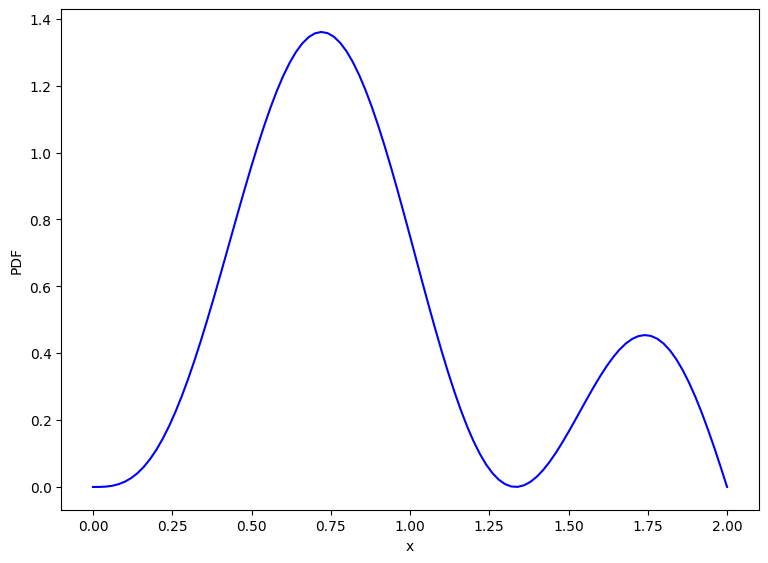

In [6]:
fig,ax = plot.subplots(1,1, figsize=figSize)

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid,pdfGrid, c='blue')

plot.xlabel('x')
plot.ylabel('PDF')

Text(0, 0.5, 'CDF')

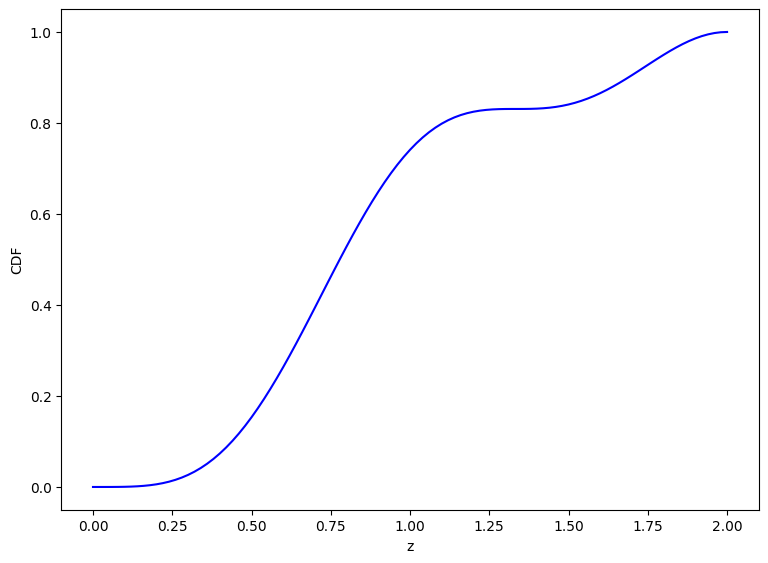

In [7]:
fig,ax = plot.subplots(1,1, figsize=figSize)

cdfX = [dist.Cdf(xV) for xV in xGrid]
plot.plot(xGrid,cdfX, c='blue')

plot.xlabel('z')
plot.ylabel('CDF')

### Map from x to z

In [8]:
x = Symbol('x')
z = Symbol('z')

mapGen = LogRatio(x,z, (0,2))
mapExp = mapGen.MapExp()
invExp = mapGen.InvExp()

mapExp

log(x/(2 - x))

In [9]:
phiQ = lambda q: log(q / (1 - q))

In [10]:
temp = invExp.subs(z,-3).evalf()
temp

0.0948517463551336

In [11]:
dist.Cdf(temp)

0.000320669189722035

In [12]:
invExp.subs(z,5).evalf()

1.98661429815143

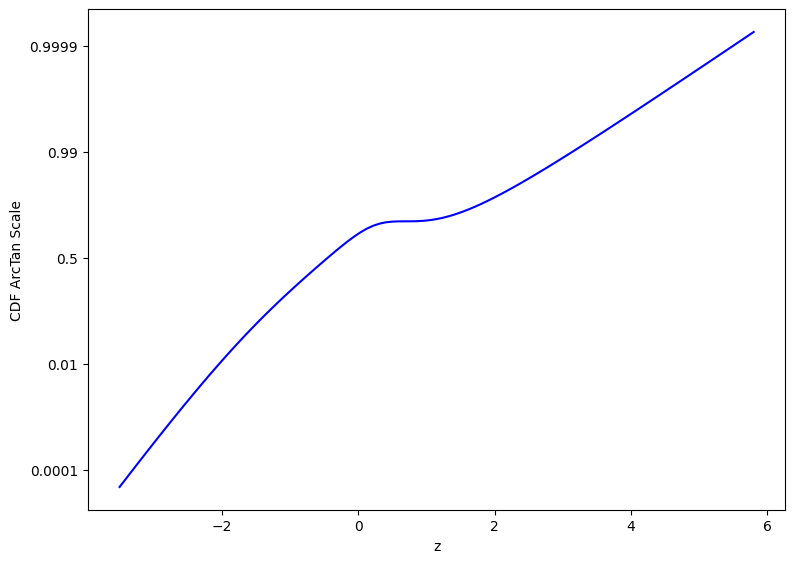

In [13]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfZ = [dist.Cdf(invExp.subs(z,zV).evalf()) for zV in zGrid]

cdfZAtan = [phiQ(q) for q in cdfZ]
plot.plot(zGrid,cdfZAtan, c='blue')

plot.xlabel('z')
plot.ylabel('CDF ArcTan Scale')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [phiQ(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## Asymptotes

#### Asymptotes of PDF

In [14]:
pdf = 3 * x * (2 - x)/4 * (1 - cos(3/2 * pi * x))
pdf

3*x*(1 - cos(3*pi*x/2))*(2 - x)/4

In [15]:
leftSeries = series(pdf, x=x, x0=0)
leftSeries

27*pi**2*x**3/16 - 27*pi**2*x**4/32 - 81*pi**4*x**5/256 + O(x**6)

In [16]:
leftTerm = 27 * pi**2 * x**3 / 16
leftTerm

27*pi**2*x**3/16

In [17]:
rightSeries = series(pdf, x=x, x0=2)
rightSeries

6 - 3*(x - 2)**2/2 + 27*pi**2*(x - 2)**3/16 + 27*pi**2*(x - 2)**4/32 - 81*pi**4*(x - 2)**5/256 - 3*x + O((x - 2)**6, (x, 2))

In [18]:
rightTerm = 3*(2 - x)
rightTerm

6 - 3*x

In [19]:
leftMaxX = fsolve(lambdify(x, leftTerm - 1), 1)[0]
leftMaxX

0.3915784873288213

In [20]:
rightMinX = fsolve(lambdify(x, rightTerm - 1), 1)[0]
rightMinX

1.6666666666666667

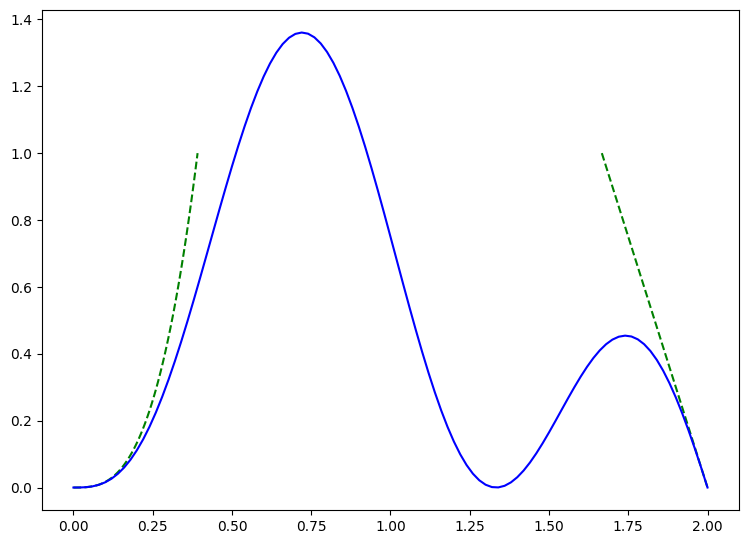

In [21]:
fig,ax = plot.subplots(1,1, figsize=figSize)

leftGrid = Grid1(0,leftMaxX, nPlot)
leftAsymX = [leftTerm.subs(x, xV).evalf() for xV in leftGrid]
plot.plot(leftGrid, leftAsymX, '--', c='green')

rightGrid = Grid1(rightMinX,2, nPlot)
rightAsymX = [rightTerm.subs(x, xV).evalf() for xV in rightGrid]
plot.plot(rightGrid, rightAsymX, '--', c='green')

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid, pdfGrid, c='blue')

### Asymptote of CDF in Terms of x

#### Left End

In [22]:
leftAsymCdfSym = integrate(leftTerm,x)
leftAsymCdfSym

27*pi**2*x**4/64

In [23]:
invExp

2*exp(z)/(exp(z) + 1)

This is just a reminder of the map used here.
In the limit as x -> 0 and z -> -infinity, x -> 2*exp(z)

In [24]:
leftAsymCdfZSym = leftAsymCdfSym.subs(x, 2*exp(z)).simplify()
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [25]:
leftAsymCdfZ = lambdify(z, leftAsymCdfZSym)

In [26]:
leftMaxZ = fsolve(lambdify(z, leftAsymCdfZSym - 0.5), 0)[0]
leftMaxZ

-1.2230373642857555

#### Right End

In [27]:
rightTerm

6 - 3*x

In [28]:
temp = integrate(rightTerm,x)
rightAsymCdfSym = 1 + temp - temp.subs(x,2)
rightAsymCdfSym

-3*x**2/2 + 6*x - 5

In [29]:
leftMaxX = fsolve(lambdify(x, leftAsymCdfSym - 0.5), 1)[0]
leftMaxX

0.5886696116323754

In [30]:
rightMaxX = fsolve(lambdify(x, rightAsymCdfSym - 0.5), 1)[0]
rightMaxX

1.4226497308103743

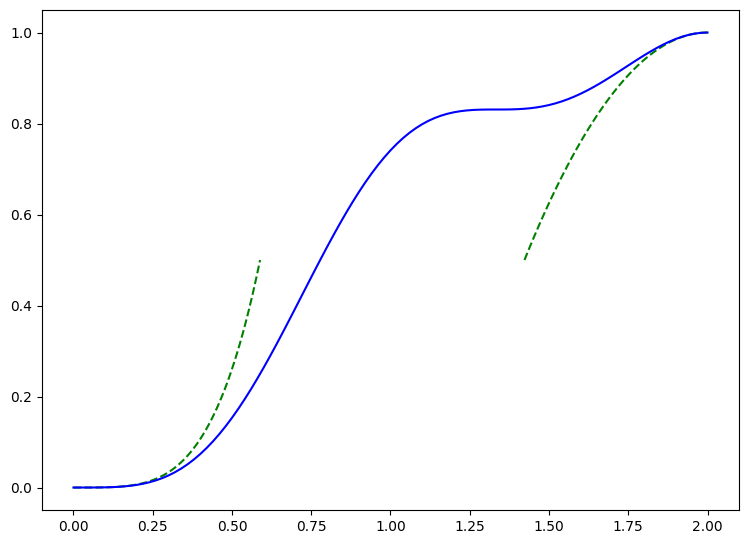

In [31]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [phiQ(dist.Cdf(invExp.subs(z,zV).evalf())) for zV in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

asymGrid = Grid1(rightMaxX, 2, nPlot)
gridAsym = [rightAsymCdfSym.subs(x,xV) for xV in asymGrid]
plot.plot(asymGrid,gridAsym, '--', c='green')

leftGrid = Grid1(0, leftMaxX, nPlot)
leftAsymAtan = [leftAsymCdfSym.subs(x, xV) for xV in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

xGrid = Grid1(0,2, nPlot)
cdfX = [dist.Cdf(xV) for xV in xGrid]
plot.plot(xGrid,cdfX, c='blue')

#### Asymptotices of CDF in terms of z

In [32]:
invExp

2*exp(z)/(exp(z) + 1)

This is just a reminder of the map used here.
In the limit as x -> 0 and z -> -infinity, x -> 2 * exp(z)

In [33]:
leftAsymCdfZSym = leftAsymCdfSym.subs(x, 2 * exp(z)).simplify()
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [34]:
leftMaxZ = fsolve(lambdify(z, leftAsymCdfZSym - 0.5), 0)[0]
leftMaxZ

-1.2230373642857555

In [35]:
rightAsymCdfSym

-3*x**2/2 + 6*x - 5

In [36]:
rightAsymCdfZSym = rightAsymCdfSym.subs(x, 2*(1 - exp(-z))).simplify()
rightAsymCdfZSym

1 - 6*exp(-2*z)

In [37]:
rightAsymCdfZ = lambdify(z, rightAsymCdfZSym)

In [38]:
rightMaxZ = fsolve(lambdify(z, rightAsymCdfZSym - 0.5), 0)[0]
rightMaxZ

1.2424533248940002

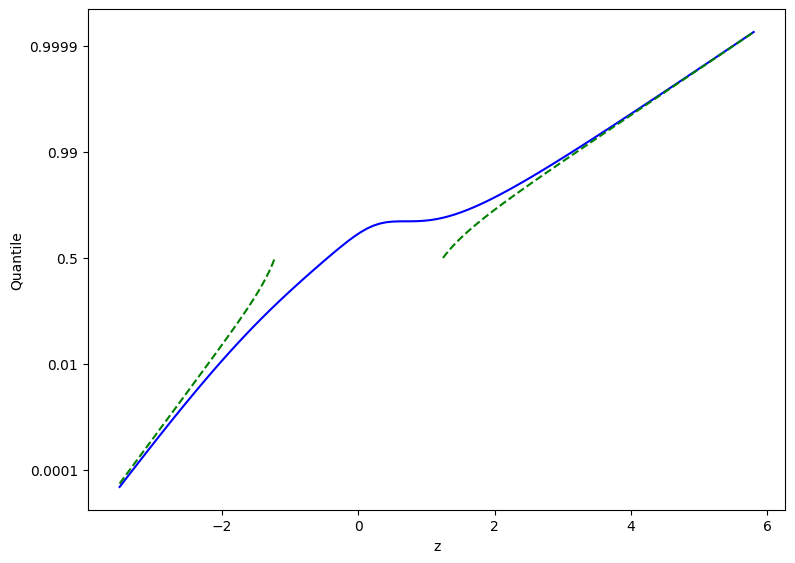

In [39]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [phiQ(dist.Cdf(invExp.subs(z,zV).evalf())) for zV in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

leftGrid = Grid1(zMin, leftMaxZ, nPlot)
leftAsymAtan = [phiQ(leftAsymCdfZ(z)) for z in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

rightGrid = Grid1(rightMaxZ, zMax, nPlot)
rightAsymAtan = [phiQ(rightAsymCdfZ(z)) for z in rightGrid]
plot.plot(rightGrid,rightAsymAtan, '--', color='green')

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [phiQ(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## Construct the Nullifier

In [40]:
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [41]:
rightAsymCdfZSym

1 - 6*exp(-2*z)

In [43]:
a0 = 27 * pi**2 / 4
a1 = 4
b0 = 6
b1 = 2

In [44]:
nullZ = (exp((a1 + b1)*z) + a0 * exp(a1*z)) / (exp((a1 + b1)*z) + (a0 + b0) * exp(a1*z) + 1)
nullZ

(exp(6*z) + 27*pi**2*exp(4*z)/4)/(exp(6*z) + (6 + 27*pi**2/4)*exp(4*z) + 1)

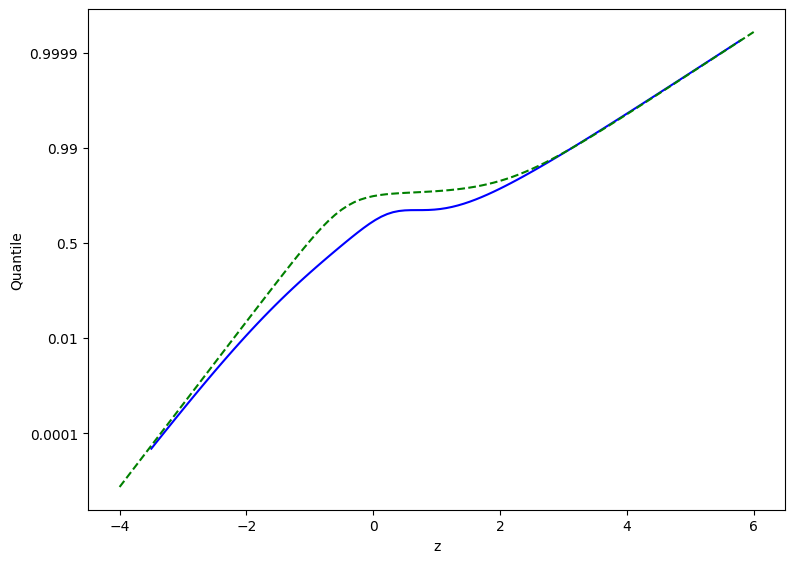

In [49]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [phiQ(dist.Cdf(invExp.subs(z,zV).evalf())) for zV in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

zGrid = Grid1(-4,6, nPlot)
nullGrid = [nullZ.subs(z, zV).evalf() for zV in zGrid]
nullGridAtan = [phiQ(q) for q in nullGrid]

plot.plot(zGrid,nullGridAtan, '--',c="green")

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [phiQ(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

### Graph Residual

In [56]:
Resid = lambda zV: dist.Cdf(invExp.subs(z,zV).evalf()) - nullZ.subs(z,zV).evalf()

TODO:  this doesn't lambdify cleanly

Text(0, 0.5, 'Residual')

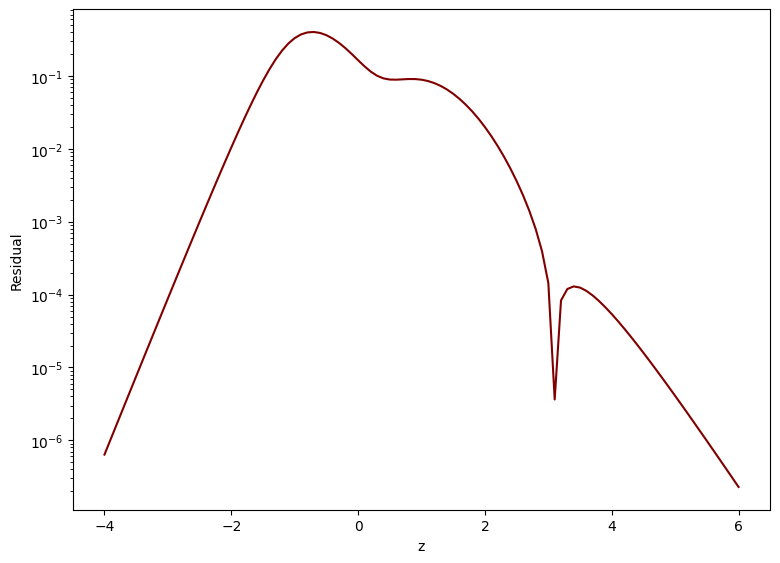

In [63]:
fig,ax = plot.subplots(1,1, figsize=figSize)

resZ = [Resid(zV) for zV in zGrid]
absResZ = [abs(r) for r in resZ]

plot.semilogy(zGrid, absResZ, c="maroon")

plot.xlabel('z')
plot.ylabel('Abs. of Residual')